Schelling's Model

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import matplotlib.cm as cm
import imageio
from IPython.display import HTML
import cmath
from scipy import signal

from pylab import rcParams
rcParams['figure.figsize'] = 14, 11
matplotlib.rc('font', **{'size': 20})

In [251]:
class Life():
    def __init__(self,
                 agents_percent=0.5,
                 low_threshold=4,
                 high_threshold=7,
                 field_size=100,
                 dimensions=2):
        '''
        Creates a class for the game of life.
        
        @param agents_percent (float): per cent of filled cells.
        @param low_threshold (int): agent wants to move if it has less tham low_threshold neighbors.
        @param high_threshold (int): agent wants to move if it has more tham low_threshold neighbors.
        @param field_size (int): size of the map dimention.
        @param dimensions (int): number od dimensions.
    
        '''
        
        assert dimensions in [2, 3]
        assert agents_percent <= 1
        assert low_threshold > 0
        assert high_threshold <= (3 ** dimensions) - 1
        
        self._dimensions = dimensions
        self._agents_percent = agents_percent
        self._field_size = field_size
        self._low_threshold = low_threshold
        self._high_threshold = high_threshold
        
        self._agents_count = []
        self._unstable_agents_count = []
        
        self._get_init_map()
        self._count_neighbors()
        self._get_unstable()
        self._unstable_agents_count.append(self._unstable)
        self._agents_count.append(self._get_agents_count())
        
    def step(self):
        ''' Makes one game step '''
        self._count_neighbors()
        self._get_unstable()
        
        self._move()
        self._unstable_agents_count.append(self._unstable)
        self._agents_count.append(self._get_agents_count())
    
    def show(self):
        ''' Plots current map state '''
        fig, axs = plt.subplots(1, 3)
        axs[0].set_title('City map')
        axs[0].matshow(self._map, cmap=cm.binary)
        
#         unstable = np.zeros(self._map.shape)
#         for i in range(len(self._unstable[0])):
#             unstable[self._unstable[0][0], self._unstable[0][1]] = 1
            
        axs[1].set_title('Moving map')
        axs[1].matshow(self._unstable, cmap=cm.binary)
        
        
    def _get_init_map(self):
        ''' Randomly distributes agents '''
        self._map = (
            np.random.rand(*[self._field_size for i in range(self._dimensions)]) < self._agents_percent
        ).astype(int)
    
    def _count_neighbors(self):
        ''' Returns matrix with counts of each elements' neighbors '''
        a = self._map
        b = np.zeros(tuple([i + 2 for i in a.shape]))
        neighbors = []
        
        if self._dimensions == 2:
            neighbors = self._count_neighbors_2d(a, b)
        if self._dimensions == 3:
            neighbors = self._count_neighbors_3d(a, b)
        
        self._neighbors = neighbors
        
    def _count_neighbors_2d(self, a, b):
        b[1:-1, 1:-1] = a
        result = np.zeros(a.shape)

        for i in range(a.shape[0]):
            for j in range(a.shape[1]):
                result[i, j] = sum(np.ravel(b[i:i+3, j:j+3]))
        return (result - a).astype(int)
    
    def _count_neighbors_3d(self, a, b):
        b[1:-1, 1:-1, 1:-1] = a
        result = np.zeros(a.shape)

        for i in range(a.shape[0]):
            for j in range(a.shape[1]):
                for k in range(a.shape[2]):
                    result[i, j, k] = sum(np.ravel(b[i:i+3, j:j+3, k:k+3]))
        return (result - a).astype(int)
    
    def _get_agents_count(self):
        return sum(np.ravel(self._map))
    
    def _get_unstable(self):
        ''' Returns arrays of unstable agents' coordinates '''
        self._unstable = ((self._low_threshold > self._neighbors) | 
                          (self._neighbors > self._high_threshold)).astype(int)
        
    def _move(self):
        pass
        
        
        

In [252]:
game = Life(agents_percent=0.5,
            low_threshold=4,
            high_threshold=7,
            field_size=10,
            dimensions=2)

In [253]:
game._map

array([[1, 1, 0, 1, 0, 1, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 1, 1, 1, 1, 1, 0, 1],
       [1, 0, 0, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 0, 0, 1, 0],
       [0, 1, 1, 0, 0, 0, 0, 1, 1, 1],
       [1, 1, 1, 0, 1, 0, 1, 1, 1, 0],
       [0, 1, 0, 0, 0, 1, 0, 1, 0, 0],
       [1, 1, 1, 0, 1, 1, 1, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 1, 1]])

In [254]:
game._neighbors

array([[2, 2, 2, 0, 2, 1, 1, 3, 1, 2],
       [3, 4, 3, 3, 5, 5, 5, 5, 3, 3],
       [2, 3, 1, 2, 4, 5, 5, 5, 6, 3],
       [3, 5, 4, 6, 7, 7, 6, 5, 5, 3],
       [3, 5, 4, 4, 4, 4, 5, 6, 6, 5],
       [5, 7, 6, 6, 4, 4, 4, 5, 5, 3],
       [3, 5, 4, 3, 1, 3, 4, 5, 5, 3],
       [5, 6, 5, 4, 4, 5, 6, 4, 4, 2],
       [3, 4, 2, 2, 2, 3, 3, 3, 4, 2],
       [2, 4, 2, 2, 2, 3, 2, 2, 2, 2]])

In [255]:
game._unstable

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 0, 0, 0, 0, 1, 1],
       [1, 1, 1, 1, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 1, 1, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 0, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1]])

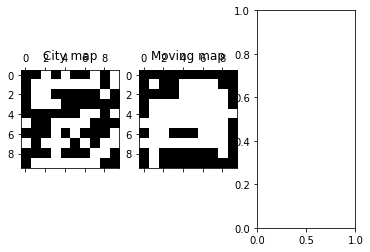

In [256]:
game.show()